<a href="https://colab.research.google.com/github/PopRazvanHoria/NLP-UB/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesarea Datelor

Limbajul scris conține multe elemente care nu relevă informație neapărat relevantă pentru taskul curent. De multe ori este mai bine să eliminăm declinările, punctuația, numerele etc. din modelarea textului. Depinzând de problema curentă, putem alege una sau mai multe metode de curățare a textului:
- Tokenizarea textului
- Transformarea în litere mici
- Eliminarea cifrelor / numerelor sau transformarea lor în cuvinte
- Eliminarea linkurilor [LINK]
- Eliminarea userilor (@) [USER]
- Eliminarea sau înlocuirea hashtagurilor (#)
- Eliminarea sau transformarea în cuvinte a emoticoanelor ( :) :D) și a emojiurilor (💙 🐱)
- Eliminarea punctuației
- Eliminarea cuvintelor comune din limbă (stopwords)
- Stemming / lemmatizare

# RegEx

Un [RegEx](https://www.w3schools.com/python/python_regex.asp) (_Regular Expression_ / _Expresie Regulată_) reprezintă un șir de caractere care definește un șablon de căutare. Poate fi folosit pentru a identifica un subșir într-un string, pentru a-l înlocui sau pentru a împărți textul în jurul lui.

Puteți vedea cum funcționează un regex pe un text anume folosind acest link: https://pythex.org/.

In [ ]:
import re

txt = "The rain   in Spain stays mainly   in the plain"
x = re.search("Spai.", txt)
x

<re.Match object; span=(14, 19), match='Spain'>

Căutarea unui string nu returnează nimic dacă nu găsește niciun match, altfel returnează un obiect cu matchul exact și poziția la care se află. Stringul devine relevant când folosim alte simboluri pentru pattern matching, cum ar fi:
- . - orice caracter
- \+ - mai multe apariții ale caracterului anterior
- \* - un număr nedefinit de apariții are caracterului anterior, incluzând 0

In [ ]:
x = re.split(" +.", txt)
print(x)

['The', 'ain', 'n', 'pain', 'tays', 'ainly', 'n', 'he', 'lain']


Alte caractere speciale:
- \d - cifre
- \D - nu cifre
- \s - spațiu
- \S - nu spațiu
- \w - litere mici, majuscule, caracterul "_"
- \W - tot ce nu e \w
- [a-m] - setul de caractere din interior. Poate include intervale

Librăria completă poate fi găsită aici https://docs.python.org/3/library/re.html.

Putem folosi un regex să identificăm toate cuvintele care includ secvența "ai":


In [ ]:
x = re.findall("\w*ai\w", txt)
print(x)

['rain', 'Spain', 'main', 'plain']


# Tokenizare

Tokenizarea este procesul de împărțire a textului în _tokens_. Tokenii nu sunt neapărat cuvinte sau propoziții, ci o secvență de caractere împărțite după o anumită regulă.

Pentru următoarele exerciții vom folosi un corpus din [NLTK](https://www.nltk.org/) pentru analiza sentimentelor.

In [ ]:
import nltk
from nltk.corpus import twitter_samples

nltk.download('punkt')
nltk.download('twitter_samples')
tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets

In [ ]:
from nltk import sent_tokenize, word_tokenize

print(tweets[6])
print(sent_tokenize(tweets[6]))
print(word_tokenize(tweets[6]))

We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI
["We don't like to keep our lovely customers waiting for long!", 'We hope you enjoy!', 'Happy Friday!', '- LWWF :) https://t.co/smyYriipxI']
['We', 'do', "n't", 'like', 'to', 'keep', 'our', 'lovely', 'customers', 'waiting', 'for', 'long', '!', 'We', 'hope', 'you', 'enjoy', '!', 'Happy', 'Friday', '!', '-', 'LWWF', ':', ')', 'https', ':', '//t.co/smyYriipxI']


Observați cum nltk desparte cuvântul "don't". Alte tokenizatoare îl pot păstra întreg. Acesta este un exemplu de decizie de tokenizare care trebuie făcută.

# Emoticoane & emojiuri

Tokenizarea se bazează de obicei pe spații și punctuație, ceea ce înseamnă că nu știe să gestioneze emoticoanele. O variantă este să ne creăm propriul regex care să identifice simbolurile să să le înlocuiască cu emoția corespunzătoare.

Un scurt exemplu:

In [ ]:
emoticons = {
    "happy": r":[\)|D+]",
    "laugh": r":\)\)+",
    "sad": r":\(+"
}

Pentru emoticoane putem folosi biblioteca [emoji](https://pypi.org/project/emoji/):

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 9.7 MB/s eta 0:00:00


In [ ]:
import emoji

print(tweets[24])
emoji.demojize(tweets[24])

💅🏽💋 - :)))) haven't seen you in years


":nail_polish_medium_skin_tone::kiss_mark: - :)))) haven't seen you in years"

# Lematizare vs. Stemming

De cele mai multe ori formatul exact în care apare un text nu este relevant, ci ne interesează mai mult informația pe care o transmite și frecvența sa în text. Din acest motiv putem reduce cuvintele la cea mai simplă formă a lor.

În cazul lematizării cea mai simplă formă este forma de dicționar și se numește _lemă_. Stemmingul folosește regex pentru a elimina prefixele și sufixele, ceea ce înseamnă că un _stem_ nu reprezintă neapărat un cuvânt real, sau poate reprezenta un alt cuvânt deja existent.

În general folosim stemmingul când vrem un răspuns rapid sau când avem de-a face cu multe cuvinte scrise incorect (ca pe rețelele de socializare).

![1_HLQgkMt5-g5WO5VpNuTl_g.jpeg](https://miro.medium.com/max/564/1*HLQgkMt5-g5WO5VpNuTl_g.jpeg)

Aici este un exemplu de cum putem folosi lematizarea sau stemmingul pentru limba engleză:

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
word = "leaves"

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(f"{word} :", lemmatizer.lemmatize(word))

leaves : leaf


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

print(f"{word} :", stemmer.stem(word))

leaves : leav


# Cuvinte comune (Stopwords)

Stopwords reprezintă cele mai des utilizate cuvinte dintr-o limbă. Deși au valoare sintactică și morfologică, stopwords nu au foarte multă valoare semantică. Cele mai multe sunt pronume ("we"), prepoziții ("for") sau conjuncții ("and"), dar putem regăsi și verbe ("is") sau numerale ("two").

[Fun fact](https://www.youtube.com/watch?v=fCn8zs912OE)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words_nltk = set(stopwords.words('english'))
print(stop_words_nltk)

{'through', 'on', 'each', 'out', "don't", 'me', 'o', 'in', "won't", 'before', "that'll", 'm', 'ourselves', "shouldn't", 'nor', 'it', "you'll", 'has', 'all', 'some', 're', 'to', 'did', 'with', "wasn't", 'this', "isn't", 'during', 'further', "haven't", 'while', 'the', 'over', 'couldn', 'same', 'and', 'have', 'here', "she's", 'between', 'aren', "hasn't", 'had', 'by', 'other', 'because', "weren't", 'than', 't', 'haven', 'until', 'but', 'y', "couldn't", 'why', 'do', 've', "needn't", 'yourselves', 'having', 's', 'is', 'just', 'isn', 'theirs', 'their', 'myself', 'whom', 'him', 'where', 'yours', 'hasn', 'doing', 'being', "you'd", 'they', 'were', 'if', 'shan', 'wasn', 'as', "should've", 'll', "mustn't", 'off', 'we', 'own', 'under', 'too', "aren't", 'shouldn', 'i', 'ma', 'he', 'above', 'once', 'will', 'against', 'his', 'hadn', 'ain', "didn't", 'that', 'how', 'there', 'most', 'hers', 'itself', 'our', "hadn't", 'then', "doesn't", 'd', 'her', 'them', 'be', 'very', 'can', 'she', 'more', 'ours', "you

# Exerciții



1. Scrie o funcție care împarte un text în tokeni folosind regex.
2. Scrie o funcție care înlocuiește toate emoticoanele (nu doar cele date ca exemplu) și emojiurile din text.
3. Scrie o funcție care primește un text și returnează varianta preprocesată. Funcția va converti toate numerele în cuvinte folosind [num2words](https://pypi.org/project/num2words/), va elimina linkurile, hashtagurile, mentions, punctuația, stopwords, va face toate textele literă mică și va aplica lematizarea sau stemming.
4. Analizează setul de date. Uită-te la elemente de preprocesare sau alte features folosind ce ați învățat în primul laborator. Ce pare important?
5. Pe baza analizei anterioare scrie o funcție de preprocesare care elimină doar informația irelevantă. Poți generaliza funcția originală specificând în lista de parametri ce modificări vrei să faci la apelarea funcției. Alternativ, poți face o clasă care include o serie de funcții care pot fi alese la inițializare. Cu cât e mai general cu atât mai bine.
6. Compară metodele de preprocesare.

In [9]:
import nltk
from nltk.corpus import twitter_samples

nltk.download('punkt')
nltk.download('twitter_samples')
tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets[:10]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


['#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 '@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!',
 '@DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!',
 '@97sides CONGRATS :)',
 'yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days',
 '@BhaktisBanter @PallaviRuhail This one is irresistible :)\n#FlipkartFashionFriday http://t.co/EbZ0L2VENM',
 "We don't like to keep our lovely customers waiting for long! We hope you enjoy! Happy Friday! - LWWF :) https://t.co/smyYriipxI",
 '@Impatientraider On second thought, there’s just not enough time for a DD :) But new shorts entering system. Sheep must be buying.',
 'Jgh , but we have to go to Bayan :D bye',
 'As an act of mischievousness, am calling the ETL layer of our in-house warehousing 

In [10]:
import re

#Split text to tokens, i split only by spaces <- Ex 1

def split_to_tokens(text):
  return re.split(" ",text)

for text in tweets[:100]:

  result = split_to_tokens(text)
  print("Text:  ", text)
  print("Result:", result)

Text:   #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Result: ['#FollowFriday', '@France_Inte', '@PKuchly57', '@Milipol_Paris', 'for', 'being', 'top', 'engaged', 'members', 'in', 'my', 'community', 'this', 'week', ':)']
Text:   @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Result: ['@Lamb2ja', 'Hey', 'James!', 'How', 'odd', ':/', 'Please', 'call', 'our', 'Contact', 'Centre', 'on', '02392441234', 'and', 'we', 'will', 'be', 'able', 'to', 'assist', 'you', ':)', 'Many', 'thanks!']
Text:   @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Result: ['@DespiteOfficial', 'we', 'had', 'a', 'listen', 'last', 'night', ':)', 'As', 'You', 'Bleed', 'is', 'an', 'amazing', 'track.', 'When', 'are', 'you', 'in', 'Scotland?!']
Text:   @97sides CONGRATS :)
Result: ['@97sides', 'CONGRATS', ':)']
Text:   ye

In [11]:
!pip install emoji

In [12]:
import re
import emoji

#Replace emoticons and emojis
replacements = {
    r':\)\)+' : "hard laugh",
    r':\)\)'  : "laugh",
    r':\)'    : "smile",
    r':D'     : "grin",
    r':-\)'   : "smile",
    r':p'     : "tongue out",
    r'\(y\)'  : "like"
}

def convert_emoticons_emoji(text, replacements):
  result = text
  for regex_condition, replacement in replacements.items():
      result = re.sub(regex_condition, replacement, result)

  return emoji.demojize(result)

for text in tweets[:100]:

  result = convert_emoticons_emoji(text, replacements)
  print("Text:  ", text)
  print("Result:", result)

Text:   #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Result: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week smile
Text:   @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Result: @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you smile Many thanks!
Text:   @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Result: @DespiteOfficial we had a listen last night smile As You Bleed is an amazing track. When are you in Scotland?!
Text:   @97sides CONGRATS :)
Result: @97sides CONGRATS smile
Text:   yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Result: yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue

Scrie o funcție care primește un text și returnează varianta preprocesată. Funcția va converti toate numerele în cuvinte folosind num2words, va elimina linkurile, hashtagurile, mentions, punctuația, stopwords, va face toate textele literă mică și va aplica lematizarea sau stemming.

In [13]:
!pip install num2words

In [14]:
from num2words import num2words
import re

def numbers_to_words(text):
  def replace(match):
      number = int(match.group(0))
      return num2words(number)

  # Use regex to find all numbers in the text
  pattern = r'\b\d+\b'
  result = re.sub(pattern, replace, text)
  return result

# Example usage:
for text in tweets[:100]:
  converted_text = numbers_to_words(text)
  print("Original text: ", text)
  print("Converted text:", converted_text)


Original text:  #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Converted text: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Original text:  @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Converted text: @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on two billion, three hundred and ninety-two million, four hundred and forty-one thousand, two hundred and thirty-four and we will be able to assist you :) Many thanks!
Original text:  @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Converted text: @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Original text:  @97sides CONGRATS :)
Converted text: @97sides CONGRATS :)
Original text:  yeaaaah yippppy!

In [15]:
def remove_links(text):
  # Regular expression pattern to match URLs
  pattern = r'http\S+'

  # Use re.sub() to remove all matches of the pattern from the text
  result = re.sub(pattern, '', text)

  return result

# Example usage:
for text in tweets[:100]:
  removed_links = remove_links(text)
  print("Original text: ", text)
  print("Removed text:", removed_links)

Original text:  #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Removed text: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Original text:  @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Removed text: @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Original text:  @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Removed text: @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Original text:  @97sides CONGRATS :)
Removed text: @97sides CONGRATS :)
Original text:  yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Removed text: yeaaaah

In [16]:
def remove_hashtags(text):
  # Regular expression pattern to match hashtags
  pattern = r'#\w+'

  # Use re.sub() to remove all matches of the pattern from the text
  result = re.sub(pattern, '', text)

  return result

# Example usage:
for text in tweets[:100]:
  removed_hashtags = remove_hashtags(text)
  print("Original text:        ", text)
  print("Removed hashtags text:", removed_hashtags)

Original text:         #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Removed hashtags text:  @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Original text:         @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Removed hashtags text: @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Original text:         @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Removed hashtags text: @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Original text:         @97sides CONGRATS :)
Removed hashtags text: @97sides CONGRATS :)
Original text:         yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick

In [17]:
def remove_references(text):
  # Regular expression pattern to match references (mentions)
  pattern = r'@\w+'

  # Use re.sub() to remove all matches of the pattern from the text
  result = re.sub(pattern, '', text)

  return result

# Example usage:
for text in tweets[:100]:
  removed_references = remove_references(text)
  print("Original text          :", text)
  print("Removed references text:", removed_references)
  print()

Original text          : #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Removed references text: #FollowFriday    for being top engaged members in my community this week :)

Original text          : @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Removed references text:  Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!

Original text          : @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Removed references text:  we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!

Original text          : @97sides CONGRATS :)
Removed references text:  CONGRATS :)

Original text          : yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 d

In [18]:
def remove_punctuation(text):
  # Regular expression pattern to match punctuation
  pattern = r'[^\w\s]'

  # Use re.sub() to remove all matches of the pattern from the text
  result = re.sub(pattern, '', text)

  return result

# Example usage:
for text in tweets[:100]:
  removed_punctuation = remove_punctuation(text)
  print("Original text           :", text)
  print("Removed punctuation text:", removed_punctuation)
  print()

Original text           : #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Removed punctuation text: FollowFriday France_Inte PKuchly57 Milipol_Paris for being top engaged members in my community this week 

Original text           : @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Removed punctuation text: Lamb2ja Hey James How odd  Please call our Contact Centre on 02392441234 and we will be able to assist you  Many thanks

Original text           : @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Removed punctuation text: DespiteOfficial we had a listen last night  As You Bleed is an amazing track When are you in Scotland

Original text           : @97sides CONGRATS :)
Removed punctuation text: 97sides CONGRATS 

Original text           : yeaaaah yippppy!!!  my accnt verified rqst has s

In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(text):
  # Tokenize the text into words
  words = text.split()

  # Get the list of English stopwords
  stop_words = set(stopwords.words('english'))

  # Filter out stopwords from the text
  filtered_words = [word for word in words if word.lower() not in stop_words]

  # Join the filtered words back into a single string
  filtered_text = ' '.join(filtered_words)

  return filtered_text

# Example usage:
for text in tweets[:100]:
  removed_stopwords = remove_stopwords(text)
  print("Original text        :", text)
  print("Removed stopword text:", removed_stopwords)
  print()

Original text        : #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Removed stopword text: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris top engaged members community week :)

Original text        : @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Removed stopword text: @Lamb2ja Hey James! odd :/ Please call Contact Centre 02392441234 able assist :) Many thanks!

Original text        : @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Removed stopword text: @DespiteOfficial listen last night :) Bleed amazing track. Scotland?!

Original text        : @97sides CONGRATS :)
Removed stopword text: @97sides CONGRATS :)

Original text        : yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Removed stopword text: yeaaaah yippppy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Original text        : Would love to see you dear in #Jordan :) waiting you! @FIRDOZ  :) @VisitJordan @dannyprol
Removed stopword text: Would love see dear #Jordan :) waiting you! @FIRDOZ :) @VisitJordan @dannyprol

Original text        : @ABNORMAL_ANA92 oh, okay :D thanks!
Removed stopword text: @ABNORMAL_ANA92 oh, okay :D thanks!

Original text        : @sssniperwolf like how to fake gameplays ;) haha Im kidding, im kidding. You do good stuff :).
Removed stopword text: @sssniperwolf like fake gameplays ;) haha Im kidding, im kidding. good stuff :).

Original text        : @dennislami @Dicle_Aygur, yeah exactly :)
Removed stopword text: @dennislami @Dicle_Aygur, yeah exactly :)

Original text        : Our new product line is in our #etsy shop now! Check it out :) http://t.co/h8exCTLQxg #boxroomcrafts
Removed stopword text: new product line #etsy shop now! Check :) http://t.co/h8exCTLQxg #boxroomcrafts

Original text        : @PeakYourMind I hope your vacation is going great! :D
Remove

In [20]:
def convert_to_lowercase(text):
    return text.lower()

# Example usage:
for text in tweets[:100]:
  converted_to_lowercase = convert_to_lowercase(text)
  print("Original text:", text)
  print("Lower text   :", converted_to_lowercase)
  print()

Original text: #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Lower text   : #followfriday @france_inte @pkuchly57 @milipol_paris for being top engaged members in my community this week :)

Original text: @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Lower text   : @lamb2ja hey james! how odd :/ please call our contact centre on 02392441234 and we will be able to assist you :) many thanks!

Original text: @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Lower text   : @despiteofficial we had a listen last night :) as you bleed is an amazing track. when are you in scotland?!

Original text: @97sides CONGRATS :)
Lower text   : @97sides congrats :)

Original text: yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Lower text   : yea

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer

def lemmatize_word(word):
  # Initialize WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()

  # Lemmatize the word
  lemmatized_word = lemmatizer.lemmatize(word)

  return lemmatized_word

# Example usage:
word = "yeahhh"
lemmatized_word = lemmatize_word(word)
print("Original word:", word)
print("Lemmatized word:", lemmatized_word)

Original word: yeahhh
Lemmatized word: yeahhh


In [23]:
def preprocessing(text):
  # Scrie o funcție care primește un text și returnează varianta preprocesată.
  #Funcția va converti toate numerele în cuvinte folosind num2words, va elimina linkurile, hashtagurile, mentions, punctuația, stopwords, va face toate textele literă mică și va aplica lematizarea sau stemming.
  result = text
  result = numbers_to_words(result)
  result = remove_links(result)
  result = remove_hashtags(result)
  result = remove_references(result)
  result = remove_punctuation(result)
  result = remove_stopwords(result)
  result = convert_to_lowercase(result)
  result = lemmatize_word(result)
  return result

# Example usage:
for text in tweets[:100]:
  preprocessed = preprocessing(text)
  print("Original text :", text)
  print("Processed text:", preprocessed)
  print()

Original text : #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Processed text: top engaged members community week

Original text : @Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!
Processed text: hey james odd please call contact centre two billion three hundred ninetytwo million four hundred fortyone thousand two hundred thirtyfour able assist many thanks

Original text : @DespiteOfficial we had a listen last night :) As You Bleed is an amazing track. When are you in Scotland?!
Processed text: listen last night bleed amazing track scotland

Original text : @97sides CONGRATS :)
Processed text: congrats

Original text : yeaaaah yippppy!!!  my accnt verified rqst has succeed got a blue tick mark on my fb profile :) in 15 days
Processed text: yeaaaah yippppy accnt verified rqst succeed got blue tick mark fb profile fifteen days

Original text : @Bh

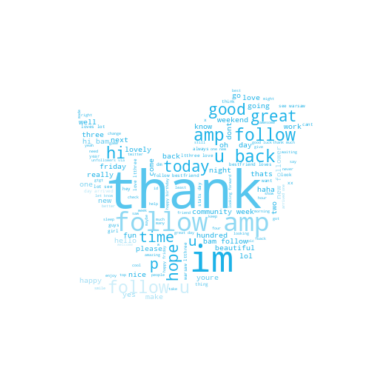

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import requests

#Creating a wordcloud
processed_tweets = []
for text in tweets[:1000]:
  processed_tweets.append(preprocessing(text))
text = ' '.join(processed_tweets)

url = 'https://upload.wikimedia.org/wikipedia/commons/f/f2/Logo_Twitter.png'

image = requests.get(url, stream=True).raw
mask = np.array(Image.open(image))
image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(background_color="white", max_words=1000, mask=mask, contour_color='black').generate(text)

plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()


Well, observ ca e bine sa le iei intr-o ordine etapele procesarii, cum ar fi, nu e util sa stergi punctuatile si apoi sa cauti emotes.

In [27]:
!apt-get install -y libenchant-dev
!pip install pyenchant


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libenchant-dev


In [29]:
import enchant

# Initialize English dictionary
english_dict = enchant.Dict("en_US")

def correct_misspelled_words(text):
    # Split the text into words
    words = text.split()

    # Iterate through each word
    corrected_words = []
    for word in words:
        # Check if the word is misspelled
        if not english_dict.check(word):
            # Attempt to suggest corrections
            suggestions = english_dict.suggest(word)
            if suggestions:
                # Take the first suggestion as the corrected word
                corrected_word = suggestions[0]
            else:
                # If no suggestions are available, keep the original word
                corrected_word = word
        else:
            # If the word is spelled correctly, keep it unchanged
            corrected_word = word

        # Append the corrected word to the list of corrected words
        corrected_words.append(corrected_word)

    # Join the corrected words back into a single string
    corrected_text = " ".join(corrected_words)

    return corrected_text

# Example usage:
text_with_misspellings = "The helo wrld. Ths is beter now."
corrected_text = correct_misspelled_words(text_with_misspellings)
print("Corrected text:", corrected_text)
# Example usage:

for text in tweets[:5]:
  converted_to_lowercase = correct_misspelled_words(text)
  print("Original text:", text)
  print("Lower text   :", converted_to_lowercase)
  print()



ImportError: The 'enchant' C library was not found and maybe needs to be installed.
See  https://pyenchant.github.io/pyenchant/install.html
for details


In [ ]:
import nltk
from nltk.corpus import words

# Download NLTK words corpus
nltk.download('words')

# Load the English word corpus
word_corpus = set(words.words())

def normalize_elongated_words(text):
  def normalize_word(word):
    if len(word) > 2 and word.lower() in word_corpus:
      return word.lower()  # If the base form exists in the corpus, return it
    else:
      return word

  # Split the text into words
  words = text.split()

  # Normalize each word
  normalized_words = [normalize_word(word) for word in words]

  # Join the normalized words back into a single string
  normalized_text = " ".join(normalized_words)

  return normalized_text

# Example usage:
# for text in tweets[:100]:
#   ad = normalize_elongated_words(text)
#   print("Original text:", text)
#   print("Lower text   :", ad)
#   print()
def normalize_word(word):
    if len(word) > 2 and word.lower() in word_corpus:
      return word.lower()  # If the base form exists in the corpus, return it
    else:
      return word
normalize_word("hellllllllllloo")

In [31]:
!pip install spellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for spellchecker: filename=spellchecker-0.4-py3-none-any.whl size=3966500 sha256=87a70dc3ea09338b8cd254f7bd671b3530ce6e50a3ebb3a44364796814a78959
  Stored in directory: /root/.cache/pip/wheels/6c/90/c3/eac248d8755b2a7343487a2087b4b29ad98f388c3c8c69c286
  Created wheel for inexactsearch: filename=inexactsearch-1.0.2-py3-none-any.whl size=7123 sha256=0785729c7df8997416274a0b9778f7e0660e5fe7f36d34cf44ecd4afec65a8ae
  Stored in directory: /root/.cache/pip/wheels/63/19/2c/5e9f447f2533d457a1167c3e553f235e232b8a639e3f5fafab
  Created wheel for silpa_common: filename=silpa_common-0.3-py3-none-any.whl size=8466 sha256=28d433f65df11b068ffa7a0428bf832d093f26226de511e584048bb4680d308f
  Stored in directory: /root/.cache/pip/wheels/c0/72/43/0c7